In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import model_selection
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import graphviz

import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()

df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target
df['flower_species'] = df.target.apply(lambda x : iris.target_names[x])
print('Unique target values=',df['target'].unique())

df.sample(5)

Unique target values= [0 1 2]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_species
54,6.5,2.8,4.6,1.5,1,versicolor
125,7.2,3.2,6.0,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica
141,6.9,3.1,5.1,2.3,2,virginica
9,4.9,3.1,1.5,0.1,0,setosa


In [3]:
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = df[['target']]

In [4]:
X_train,X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size= 0.2, random_state= 1)

In [5]:
model = tree.DecisionTreeClassifier(random_state= 1)
model.fit(X_train ,y_train)

DecisionTreeClassifier(random_state=1)

In [6]:
model.score(X_test, y_test)

0.9666666666666667

[Text(0.4, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(0.3, 0.75, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.35, 0.8333333333333333, 'True  '),
 Text(0.5, 0.75, 'x[3] <= 1.65\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(0.45, 0.8333333333333333, '  False'),
 Text(0.2, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(0.3, 0.4166666666666667, 'x[0] <= 6.05\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(0.2, 0.25, 'x[3] <= 1.55\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.1, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.5833333333333334, 'x[2] <= 4.85\ngini = 0.048\nsamples = 41\nvalue = [0, 1, 40]'),
 T

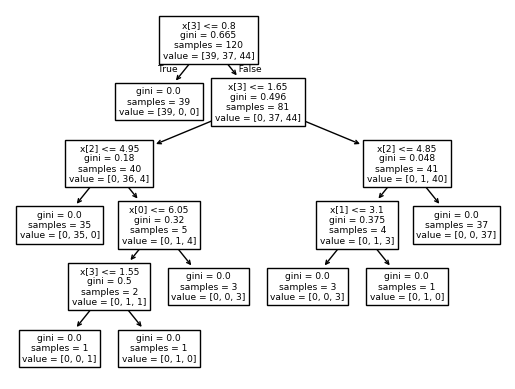

In [7]:
tree.plot_tree(model)

In [8]:
"""
dot_data = tree.export_graphviz(model, out_file=None,
                      feature_names=iris.feature_names,
                      class_names=iris.target_names,
                      filled=True, rounded=True,
                      special_characters=True)
graph = graphviz.Source(dot_data)
graph
"""

'\ndot_data = tree.export_graphviz(model, out_file=None,\n                      feature_names=iris.feature_names,\n                      class_names=iris.target_names,\n                      filled=True, rounded=True,\n                      special_characters=True)\ngraph = graphviz.Source(dot_data)\ngraph\n'

# Задача
Подобрать значения гиперпараметров модели criterion, max_depth, min_samples_leaf с помощью перебора по сетке.

Наилучшие параметры: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1}
Лучшая точность на кросс-валидации: 0.9666666666666668
Точность на тестовой выборке: 0.9666666666666667


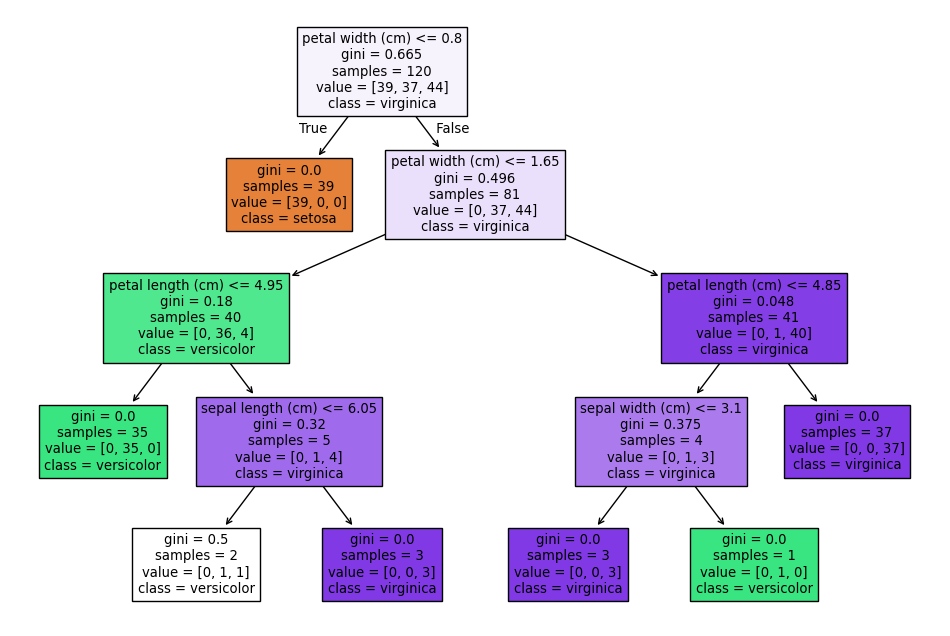

In [9]:
# параметры перебора
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, 6, None],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

# перебор по сетке с кросс-валидацией
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# результаты
print("Наилучшие параметры:", grid_search.best_params_)
print("Лучшая точность на кросс-валидации:", grid_search.best_score_)

# проверка точности на тестовой выборке
best_model = grid_search.best_estimator_
print("Точность на тестовой выборке:", best_model.score(X_test, y_test))

# визуализация
plt.figure(figsize=(12, 8))
tree.plot_tree(best_model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()